# LAS w/ priorities policy with continuous-multiple traces

In this notebook, we compare heterogeneity-agnostic and heterogeneity-aware LAS policies with multiple priorities on traces with single-GPU and multi-GPU jobs.

## Import statements

In [1]:
from plotting_utils import plot_metric_vs_inverse_lambda_different_metric_fns
from utils import get_logfile_paths, average_jct_low_priority_fn, average_jct_high_priority_fn

## Get list of relevant logfiles and define label mapping

In [2]:
logfile_paths = sorted(get_logfile_paths(
    "/future/u/deepakn/gavel/logs/multi_gpu_continuous_jobs_priorities_final/"))

In [3]:
labels = {"max_min_fairness_water_filling": "LAS",
          "max_min_fairness_water_filling_perf": "Gavel"}

## Plot average JCT versus input job rate for multi-GPU traces

V100s=36, P100s=36, K80s=36; Jobs 4000-5000
['isolated', 'max_min_fairness_water_filling', 'max_min_fairness_water_filling_perf']
                                 metric  seed
policy       input_job_rate                  
Gavel (high) 0.2              20.064418     1
             0.4              20.103030     1
             0.6              20.101805     1
             0.8              19.974162     1
             1.0              19.750648     1
             1.2              19.396618     1
             1.4              19.172189     1
             1.6              18.962719     1
             1.8              18.897935     1
             2.0              18.921760     1
             2.2              19.004482     1
             2.4              18.552369     1
             2.6                    NaN     1
             2.8                    NaN     1
             3.0                    NaN     1
Gavel (low)  0.2              17.556564     1
             0.4              17.593079   

/lfs/1/deepak/gpusched/scheduler/notebooks/figures/evaluation/plotting_utils.py:209: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


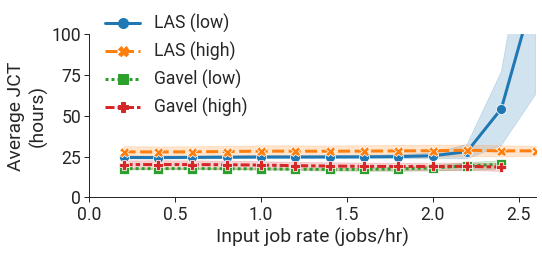

In [4]:
print("V100s=36, P100s=36, K80s=36; Jobs 4000-5000")
plot_metric_vs_inverse_lambda_different_metric_fns(
    logfile_paths,
    labels,
    v100s=36, p100s=36, k80s=36,
    policies=["isolated",
              "max_min_fairness_water_filling", "max_min_fairness_water_filling_perf"],
    metric_fns=[lambda x: average_jct_low_priority_fn(
                    x, min_job_id=4000, max_job_id=5000),
                lambda x: average_jct_high_priority_fn(
                    x, min_job_id=4000, max_job_id=5000)],
    metric_fn_labels=["low", "high"],
    metric_label="Average JCT\n(hours)",
    xmax=2.6,
    ymax=100.0,
    output_filename="continuous_jobs/multi_gpu_las_priorities_v100=36_p100=36_k80=36.pdf"
)